### Case Study 3 : Spam classifier

Submitted by:

- Ravi Sivaraman
- Balaji Avvaru
- Apurv Mittal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from os.path import isfile
import email
# import nlp
#import spacy
#import BeautifulSoup
from bs4 import BeautifulSoup
import re

import warnings
warnings.filterwarnings("ignore")

In [4]:
# location of emails
#data_path = "/Users/ravis/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/Case Study 3/SpamAssassinMessages"
#data_path = "/Users/ravis/Downloads/SpamAssassinMessages"
data_path = "/Users/apurv/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/SMU/7333 - QTW/Case Study 3/SpamAssassinMessages"
#data_path = "/SpamAssassinMessages"
# get all sub folders
sub_folders = [x[0] for x in os.walk(data_path) if x[0] != data_path]

In [5]:
sub_folders

['/Users/apurv/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/SMU/7333 - QTW/Case Study 3/SpamAssassinMessages/spam',
 '/Users/apurv/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/SMU/7333 - QTW/Case Study 3/SpamAssassinMessages/hard_ham',
 '/Users/apurv/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/SMU/7333 - QTW/Case Study 3/SpamAssassinMessages/spam_2',
 '/Users/apurv/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/SMU/7333 - QTW/Case Study 3/SpamAssassinMessages/easy_ham',
 '/Users/apurv/Library/CloudStorage/OneDrive-SouthernMethodistUniversity/SMU/7333 - QTW/Case Study 3/SpamAssassinMessages/easy_ham_2']

In [6]:
%%time
# read all emails from all sub folders
mail_ty = []
text_ty = []
data = []
target = []
for folder in sub_folders:
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    for file in files:
        with open(f"{folder}/{file}", encoding="latin1") as f:
            #    with open(f"{folder}/{file}","r") as f:
            x = email.message_from_file(f)
          #  print(x)
    #    if (file != 'cmds'): 
    #        mail_data.append(lines)
            
        mail_type = x.get_content_type()
        text_type = x.get_content_charset()
        mail_ty.append(mail_type)
        text_ty.append(text_type)
        if re.search("spam", folder):
            target.append(1)
        else:
             target.append(0)
                
        #if mail_type == "text/plain" and (text_type == 'iso-8859-1' or text_type == 'us-ascii' or text_type == ''):
        #if mail_type == "text/plain":
        #    data.append(x.get_payload())
        #elif mail_type == "text/html":
        #    tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        #    tmp = tmp.text.replace("\n", " ")
        #    data.append(tmp)
        #else:
        #    print("incorrect format", mail_type,text_type)    
        
        if mail_type == "text/html":
            tmp = BeautifulSoup(x.get_payload(), 'html.parser')
            tmp = tmp.text.replace("\n", " ")
            data.append(tmp)
        else:
            data.append(x.get_payload()) 
                       

CPU times: user 17.6 s, sys: 3.28 s, total: 20.8 s
Wall time: 26min 50s


In [7]:
df = pd.DataFrame()

In [8]:
df["mail_types"] = mail_ty
df["text_types"] = text_ty

In [9]:
df["mail_types"].value_counts()

text/plain                     7413
text/html                      1193
multipart/alternative           326
multipart/signed                180
multipart/mixed                 179
multipart/related                56
multipart/report                  5
text/plain charset=us-ascii       1
Name: mail_types, dtype: int64

In [10]:
df["text_types"].value_counts()

us-ascii           3275
iso-8859-1         1958
windows-1252        197
iso-8859-15         104
utf-8                22
default              15
iso-8859-2           13
gb2312               11
windows-1251         11
default_charset      10
iso-2022-jp           8
ks_c_5601-1987        7
windows-1254          6
koi8-r                6
iso-8859-9            4
unknown-8bit          2
iso-8859-3            1
gb2312_charset        1
windows-1256          1
chinesebig5           1
euc-kr                1
Name: text_types, dtype: int64

In [11]:
email_df = pd.DataFrame()
email_df["data"] = data
#email_df["mail_type"] = mail_ty
#email_df["text_type"] = text_ty
email_df["target"] = target

In [13]:
email_df['target'].value_counts()

0    6954
1    2399
Name: target, dtype: int64

In [14]:
email_df

,data,target
0,"Dear Homeowner,\n \nInterest Rates are at thei...",1
1,"[[Content-Type, Content-Transfer-Encoding], [C...",1
2,"[[Content-Type, Content-Transfer-Encoding], [C...",1
3,Congratulations! You Get a Free Handheld Orga...,1
4,ATTENTION: This is a MUST for ALL Computer Use...,1
...,...,...
9348,"I'm one of the 30,000 but it's not working ver...",0
9349,Damien Morton quoted:\n>W3C approves HTML 4 'e...,0
9350,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n> t...",0
9351,"Once upon a time, Manfred wrote :\n\n> I would...",0


In [15]:
email_df["data_new"] = [''.join(str(item)) for item in email_df.data]

In [46]:
print(email_df["data_new"][4])

ATTENTION: This is a MUST for ALL Computer Users!!!

*NEW-Special Package Deal!*

Norton SystemWorks 2002 Software Suite -Professional Edition-

Includes Six - Yes 6! - Feature-Packed Utilities
ALL For 1 Special LOW Price!

This Software Will:
- Protect your computer from unwanted and hazardous viruses
- Help secure your private & valuable information
- Allow you to transfer files and send e-mails safely
- Backup your ALL your data quick and easily
- Improve your PC's performance w/superior integral diagnostics!

6 Feature-Packed Utilities...1 Great Price!
A $300+ Combined Retail Value!

YOURS for Only $29.99!  <Includes FREE Shipping!>

Don't fall prey to destructive viruses or hackers!
Protect  your computer and your valuable information!


So don't delay...get your copy TODAY!


http://euro.specialdiscounts4u.com/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
This email has been screened and filtered by our in house ""OPT-OUT"" system in 
compliance wi

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer()

In [18]:
new_vectors = tf_vectorizer.fit_transform(email_df.data_new)

In [19]:
new_vectors.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03543654, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [21]:
LR.fit(new_vectors,email_df['target'])

LogisticRegression()

In [22]:
preds = LR.predict(new_vectors)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(email_df['target'],preds)

0.9917673473751737

#### Logistic Regression with GridsearchCV

In [24]:
#Create Cross Validation Procedure
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# define parameters
penalty_LR = ['l1', 'l2', 'elasticnet', 'none'] 
#penalty_LR = [ 'l1', 'l2'] 
C_LR = [0.001, 0.01, 0.1, 1, 10, 100, 1000]  
#C_LR = [0.001,10, 100]  
max_iter_LR = [500]
#max_iter_LR = [500]
class_weight_LR = ['balanced']
#solver_LR = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solver_LR = ['lbfgs', 'liblinear']

# define grid search
param_grid_LR = dict(penalty=penalty_LR, C=C_LR, max_iter=max_iter_LR, class_weight=class_weight_LR, solver=solver_LR)

grid_search_LR = GridSearchCV(estimator=LR, param_grid=param_grid_LR, n_jobs=-1, cv=cv, 
                              scoring='accuracy',error_score=0)

In [26]:
%%time
grid_result_LR = grid_search_LR.fit(new_vectors,email_df['target'])
# summarize results
print("Best: %f using %s" % (grid_result_LR.best_score_, grid_result_LR.best_params_))
means = grid_result_LR.cv_results_['mean_test_score']
stds = grid_result_LR.cv_results_['std_test_score']
params = grid_result_LR.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The sc

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 59

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/apurv/opt/anaconda3/envs/msds/lib

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The scor

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/apurv/opt/anaconda3/envs/msds/lib

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The scor

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The sc

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The scor

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/apurv/opt/anaconda3/envs/msds/lib

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The sc

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The scor

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The sc

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The scor

/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/apurv/opt/anaconda3/envs/msds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/apurv/opt/anaconda3/envs/msds/lib

Best: 0.960333 using {'C': 10, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'lbfgs'}
0.743505 (0.000318) with: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
0.922806 (0.008747) with: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924302 (0.008461) with: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.958945 (0.011690) with: {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000

In [27]:
# The GridSearch algorithm determined the following optimal parameters
best_Estimator_LR =grid_result_LR.best_estimator_
best_Estimator_LR

LogisticRegression(C=10, class_weight='balanced', max_iter=500)

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

def displayModel_metrics(best_model, grid_model, features, target, cv):
    metrics = cross_validate(best_model, features, y=target, cv=cv, 
                             scoring=['accuracy','precision','recall'], return_train_score=True) 
    
    y_predict = cross_val_predict(best_model, features, target, cv=cv)

    print('\nBest Accuracy with Grid Search            : {:.3f}'.format(grid_model.best_score_))
    print('\nTraining data Metrics')
    print('\n     The average accuraccy : {:.3f}'.format(metrics['train_accuracy'].mean()))
    print('     The average precision : {:.3f}'.format(metrics['train_precision'].mean()))
    print('     The average recall    : {:.3f}'.format(metrics['train_recall'].mean()))

    print('\nTest data Metrics')
    print('\n     The average accuracy  : {:.3f}'.format(metrics['test_accuracy'].mean()))
    print('     The average precision : {:.3f}'.format(metrics['test_precision'].mean()))
    print('     The average  recall   : {:.3f}'.format(metrics['test_recall'].mean()))
    
    matrix = classification_report(target, y_predict, labels=[1,0])
    print('\nClassification report\n')
    print(matrix)

In [29]:
# Display model metrics
displayModel_metrics(best_Estimator_LR, grid_result_LR, new_vectors,email_df['target'], cv)

KeyboardInterrupt: 

#### Naive Bayes

In [ ]:
# Naive Bayes (NB) classifier 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(new_vectors,email_df['target'])

In [ ]:
# define parameters
C_nb = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]  
nb_prior=[True, False]

nb_clf = MultinomialNB()
# define grid search
param_grid_nb = dict(alpha=C_nb, fit_prior=nb_prior)

grid_search_nb = GridSearchCV(estimator=nb_clf, param_grid=param_grid_nb, n_jobs=-1, cv=cv, 
                              scoring='accuracy',error_score=0)

In [ ]:
%%time
grid_result_nb = grid_search_nb.fit(new_vectors,email_df['target'])
# summarize results
print("Best: %f using %s" % (grid_result_nb.best_score_, grid_result_nb.best_params_))
means = grid_result_nb.cv_results_['mean_test_score']
stds = grid_result_nb.cv_results_['std_test_score']
params = grid_result_nb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# The GridSearch algorithm determined the following optimal parameters
best_Estimator_nb =grid_result_nb.best_estimator_
best_Estimator_nb

In [ ]:
# Display model metrics
displayModel_metrics(best_Estimator_nb, grid_result_nb, new_vectors,email_df['target'], cv)

#### Clustering

In [ ]:
%%time
#import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=500, min_samples=50).fit(new_vectors)
newfeature = clusterer.labels_ 
X_DBS_clusters = np.column_stack((new_vectors.toarray(), pd.get_dummies(newfeature)))

In [ ]:
new_vectors

In [ ]:
pd.get_dummies(newfeature)

In [ ]:
new_vectors.shape

In [ ]:
newfeature = clusterer.labels_

In [ ]:
#pip install hdbscan

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.05, min_samples=5)

In [ ]:
pred = db.fit_predict(new_vectors)

In [ ]:
max(pred)

In [ ]:
import pandas as pd
df = pd.DataFrame(pred)

In [ ]:
df[0].value_counts()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 5, tol=0.0001, max_iter=300)

In [ ]:
pred = kmeans.fit_predict(new_vectors)

In [ ]:
email_df['target'].tail()

In [ ]:
email_df['pred'] = pred

In [59]:
email_df

,data,target,data_new,pred
0,"Dear Homeowner,\n \nInterest Rates are at thei...",1,"Dear Homeowner,\n \nInterest Rates are at thei...",0
1,"[[Content-Type, Content-Transfer-Encoding], [C...",1,[<email.message.Message object at 0x16c8e8d60>...,2
2,"[[Content-Type, Content-Transfer-Encoding], [C...",1,[<email.message.Message object at 0x16c8e80a0>...,2
3,Congratulations! You Get a Free Handheld Orga...,1,Congratulations! You Get a Free Handheld Orga...,1
4,ATTENTION: This is a MUST for ALL Computer Use...,1,ATTENTION: This is a MUST for ALL Computer Use...,1
...,...,...,...,...
9348,"I'm one of the 30,000 but it's not working ver...",0,"I'm one of the 30,000 but it's not working ver...",3
9349,Damien Morton quoted:\n>W3C approves HTML 4 'e...,0,Damien Morton quoted:\n>W3C approves HTML 4 'e...,0
9350,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n> t...",0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n> t...",3
9351,"Once upon a time, Manfred wrote :\n\n> I would...",0,"Once upon a time, Manfred wrote :\n\n> I would...",3


In [47]:
email_df.data[1]

In [60]:
#email_df.loc[['target' == 1]]

email_df[(email_df['target'] == 1)]['pred'].value_counts()

1    1058
0     807
2     403
3      74
4      57
Name: pred, dtype: int64

In [61]:
correct_prediction = 0
for i in range(0, 9348):
    if email_df['target'].loc[i] != email_df['pred'].loc[i]:
        correct_prediction += 1

correct_prediction

5538

In [62]:
2334/9348

0.2496790757381258

### Apurv

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
#vectorizer = TfidfVectorizer()
my_stop_words = text.ENGLISH_STOP_WORDS.union(["spamassassin", "email", "message", "\n", "nbsp", "font","exhm", "subject", "list", "url", "net"])
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=my_stop_words)
X = vectorizer.fit_transform(email_df.data_new)

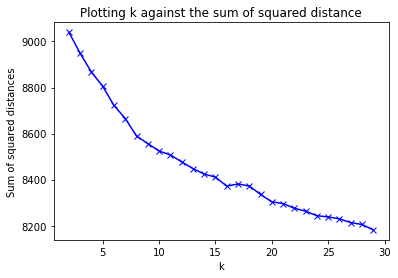

In [37]:
#Find the Elbow to get the Optimal K value

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,30)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Plotting k against the sum of squared distance')
plt.show()

# Code Reference: https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

In [38]:
import pandas as pd
k_val = 16
kmeans = KMeans(n_clusters=k_val, init='k-means++', max_iter=200, n_init=10)
kmeans.fit(X)
labels=kmeans.labels_
email_clustered_df=pd.DataFrame(list(zip(email_df.data_new,labels)),columns=['review','cluster'])
print(email_clustered_df.sort_values(by=['cluster']))

                                                 review  cluster
2629  [<email.message.Message object at 0x10a3ad9a0>...        0
5578  [<email.message.Message object at 0x10aed6ac0>...        0
1411  [<email.message.Message object at 0x10a347040>...        0
529   [<email.message.Message object at 0x10ab89fa0>...        0
530     [<email.message.Message object at 0x10a31f430>]        0
...                                                 ...      ...
5682  It's a fair trade, IMO.  Same for some mid-eas...       15
3578  \nIn essence, hindsight justification.  The pr...       15
3564  \nI'm not sure which way to make\nthe old bits...       15
3552  \n--- begin forwarded text\n\n\nStatus: RO\nFr...       15
4264  On Fri, 23 Aug 2002, Robert Harley wrote:\n\n-...       15

[9353 rows x 2 columns]


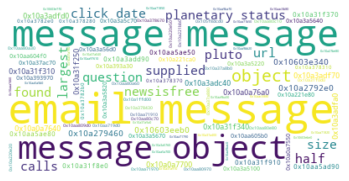

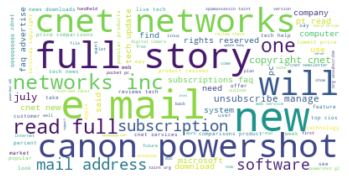

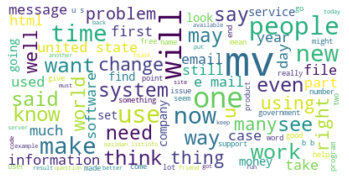

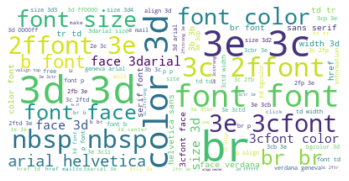

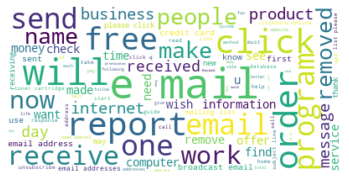

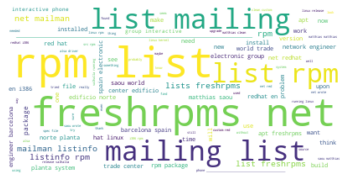

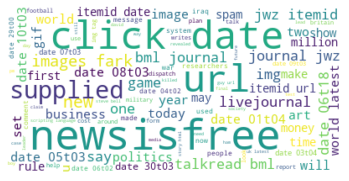

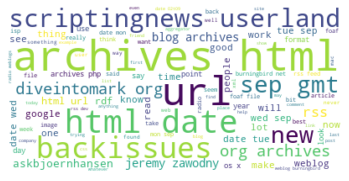

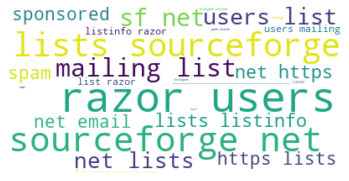

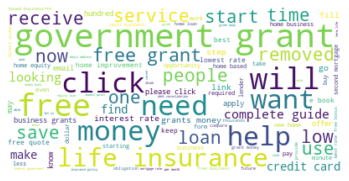

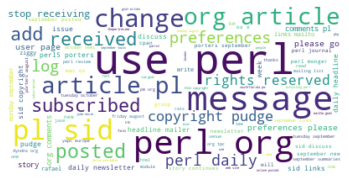

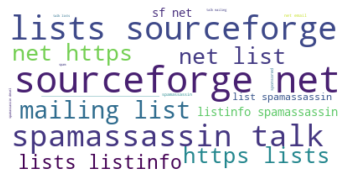

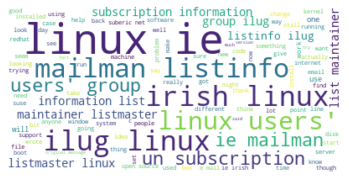

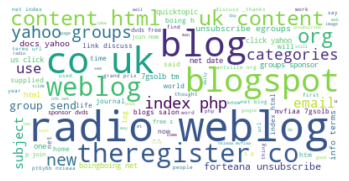

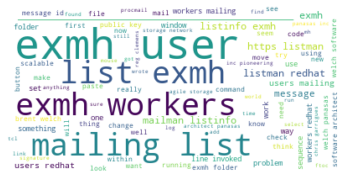

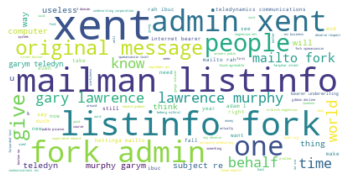

In [39]:
from wordcloud import WordCloud

#vectorizer = TfidfVectorizer(stop_words={'english'})
my_stop_words = text.ENGLISH_STOP_WORDS.union(["spamassassin", "email", "message", "\n", "nbsp", "font","exhm", "subject", "list", "url", "net"])

vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=my_stop_words)



X = vectorizer.fit_transform(email_df.data_new)
clusters = list(kmeans.labels_)

kmeans_result={'cluster':clusters,'reviews':email_df.data_new}
kmeans_result=pd.DataFrame(kmeans_result)
for k in range(0,k_val):
   s=kmeans_result[kmeans_result.cluster==k]
   text=s['reviews'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [40]:
my_stop_words

frozenset({'\n',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
   